In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os as os
import scipy.io as sio
import numpy as np
from FTools.fang_plot import *
from pysit.util.util import *
from pysit.util.compute_tools import *
import tensorflow as tf


In [2]:
HOME = os.getenv('HOME');
# FigureRootDir = HOME + '/Dropbox (MIT)/Project/PaperToSub/Journal/FWIPE/ExxonPaper/fig'
FigureRootDir = HOME + '/Dropbox_MIT/Project/PaperToSub/Journal/FWIPE/ExxonPaper/fig'
FigureSubDir = '/Marmousi/InitialModelEIP1'

if not os.path.exists(FigureRootDir+FigureSubDir):
    os.makedirs(FigureRootDir+FigureSubDir, exist_ok=True)



In [3]:
def load_model(file):
    A = sio.loadmat(file)
    vel = A['data']
    o = A['o']
    d = A['d']
    n = A['n']
    o = o[0]
    d = d[0]
    n = n[0]
    
    return vel, o, d, n
    

## Initial model
### Models

In [4]:
ResultDirSF = HOME + '/Dropbox_MIT/ResultFromTH/ExxonProject/MarmousiModel/Result/ExpPeriod201907/InitialModelCompare'
# ResultDirSF = HOME + '/Dropbox (MIT)/ResultFromTH/ExxonProject/MarmousiModel/Result/ExpPeriod201907/InitialModelCompare'

#### Load models

In [5]:
STR1 = ['LS', 'EIP1', 'OTL', 'OTE']
STR_LABEL = ['LS', 'EI', 'OTL', 'OTE']
Dicts = ['500', '600', '700', '800', '900', '1000', '1100', '1200', '1300', '1400']
Dicts2 = ['GSKW = 500 m', 'GSKW = 600 m', 'GSKW = 700 m', 'GSKW = 800 m', 'GSKW = 900 m',
          'GSKW = 1000 m', 'GSKW = 1100 m', 'GSKW = 1200 m', 'GSKW = 1300 m', 'GSKW = 1400 m']
Models = dict()

for i in range(len(STR1)):
    modelsi = dict()
    for j in range(len(Dicts)):
        if i!=5:
            str = '/' + STR1[i] + '_Result/' + STR1[i] + '_BoxConstraint_SmoothInitial' + Dicts[j] + '/result.mat'
        else:
            str = '/' + STR1[i] + '_Result/' + STR1[i] + 'LS_BoxConstraint_SmoothInitial' + Dicts[j] + '/result.mat'
        file_name = ResultDirSF + str
        if os.path.exists(file_name):
            vel, o, d, n = load_model(file_name)
            modelsi[Dicts[j]] = vel
        else:
            modelsi[Dicts[j]] = None
            
        Models[STR1[i]] = modelsi
        
Ini_Models = dict()
for j in range(len(Dicts)):
    str = '/LS_Result/LS_BoxConstraint_SmoothInitial' + Dicts[j] + '/initial.mat'
    file_name = ResultDirSF + str
    if os.path.exists(file_name):
        vel, o, d, n = load_model(file_name)
        Ini_Models[Dicts[j]] = vel
    else:
        Ini_Models[Dicts[j]] = None
            
            

In [6]:
if os.path.exists(file_name):
    print(1)
else:
    print(0)

1


#### Plot Models

In [9]:
clim_vel = [1.5, 5.5]
output = odn2grid(o,d,n)
zaxis = output[0]
xaxis = output[1]
for i in range(len(STR1)):
    fig, ax = plt.subplots(len(Dicts),1,figsize=(5,50))
    for j in range(len(Dicts)):
        if Models[STR1[i]][Dicts[j]] is not None:
            imagesc(Models[STR1[i]][Dicts[j]], Lateral=xaxis, Depth=zaxis, clim=clim_vel, title_str=Dicts2[j], 
                    xlabel='X [km]', ylabel='Z [km]', cmap='jet', ax=ax[j], fig=fig, colorbar=False)
    FigureFile = FigureRootDir+FigureSubDir+'/IMModels_' + STR1[i]
#     plt.savefig(FigureFile + '.pdf', bbox_inches='tight')
#     plt.savefig(FigureFile + '.png', bbox_inches='tight')
#     plt.savefig(FigureFile + '.eps', bbox_inches='tight')
    plt.close(fig)
    

In [10]:
fig, ax = plt.subplots(len(Dicts),1,figsize=(5,50))
for j in range(len(Dicts)):
    imagesc(Ini_Models[Dicts[j]], Lateral=xaxis, Depth=zaxis, clim=clim_vel, title_str=Dicts2[j], 
                    xlabel='X [km]', ylabel='Z [km]', cmap='jet', ax=ax[j], fig=fig, colorbar=False)
FigureFile = FigureRootDir+FigureSubDir+'/IMModels_Initials' 
# plt.savefig(FigureFile + '.pdf', bbox_inches='tight')
# plt.savefig(FigureFile + '.png', bbox_inches='tight')
# plt.savefig(FigureFile + '.eps', bbox_inches='tight')
plt.close(fig)

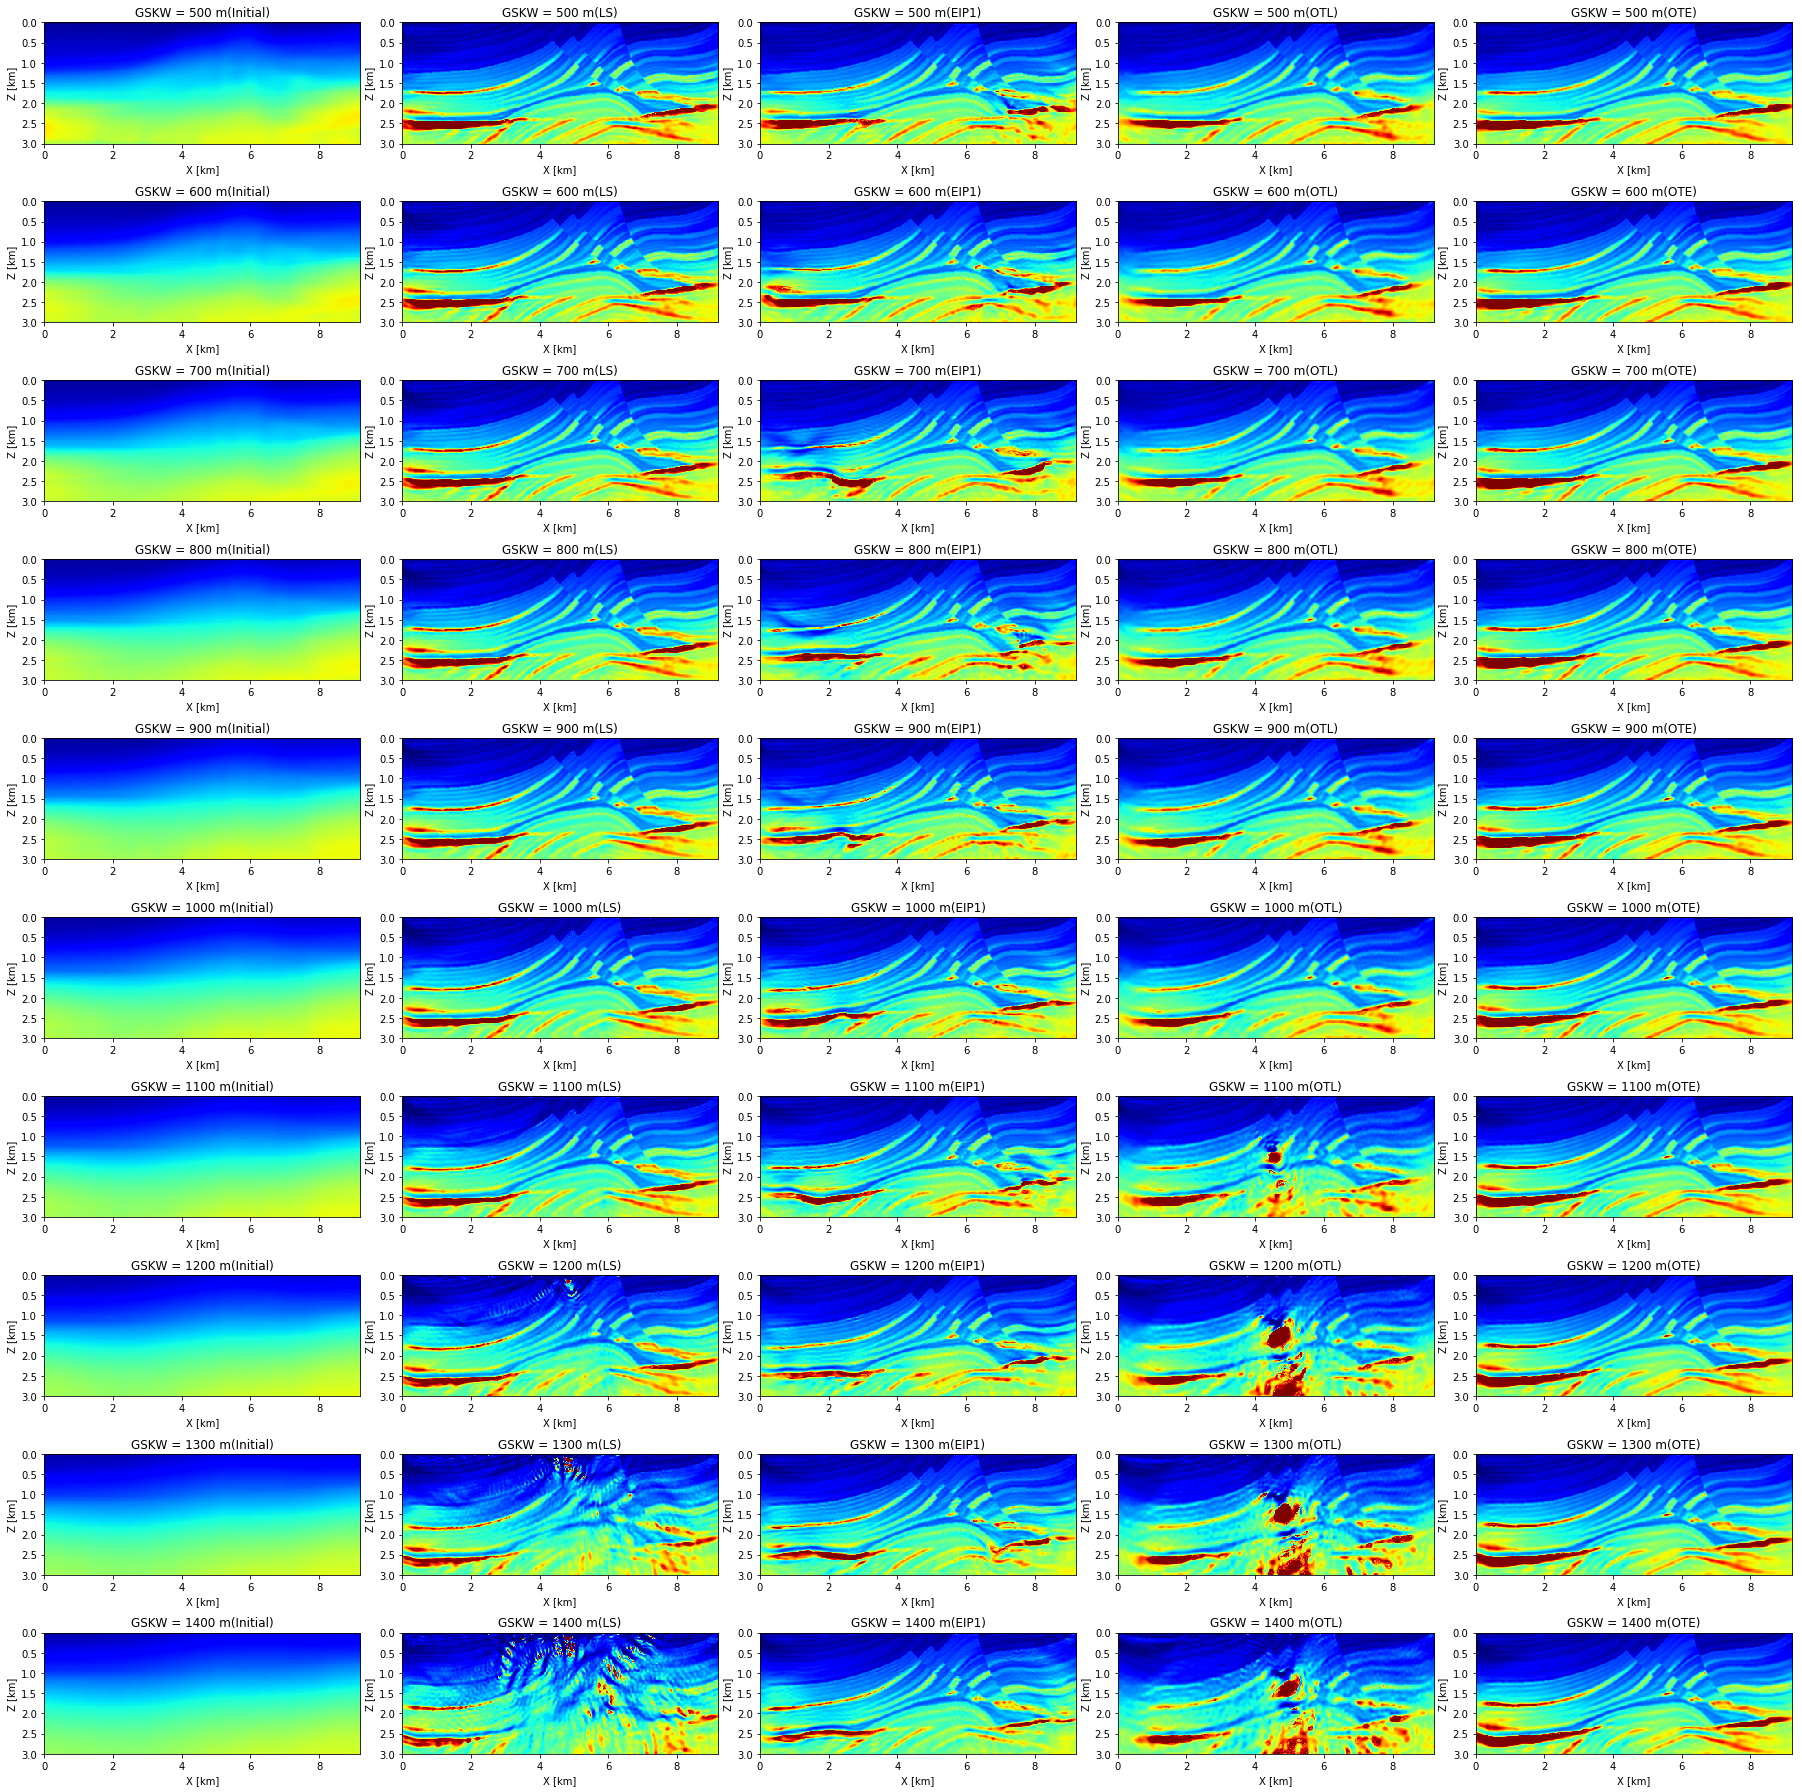

In [16]:
fig, ax = plt.subplots(len(Dicts),len(STR1)+1,figsize=(25,25))
for j in range(len(Dicts)):
    imagesc(Ini_Models[Dicts[j]], Lateral=xaxis, Depth=zaxis, clim=clim_vel, title_str=Dicts2[j]+'(Initial)', 
                    xlabel='X [km]', ylabel='Z [km]', cmap='jet', ax=ax[j][0], fig=fig, colorbar=False)
for i in range(len(STR1)):
    for j in range(len(Dicts)):
        if Models[STR1[i]][Dicts[j]] is not None:
            imagesc(Models[STR1[i]][Dicts[j]], Lateral=xaxis, Depth=zaxis, clim=clim_vel, title_str=Dicts2[j]+'('+STR1[i]+')', 
                    xlabel='X [km]', ylabel='Z [km]', cmap='jet', ax=ax[j][i+1], fig=fig, colorbar=False)
plt.tight_layout()

#### Plot Model errors

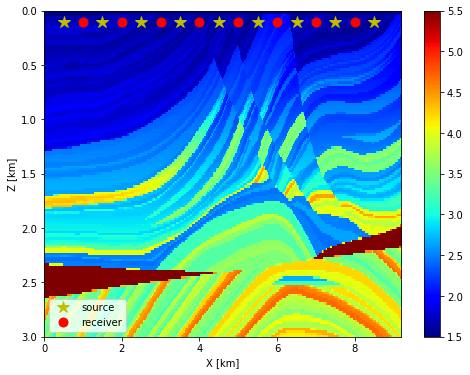

In [10]:
vtrue_file = ResultDirSF + '/true.mat'
vt, o, d, n = load_model(vtrue_file)
PaperSizeModel = [8,6]
fig, ax = plt.subplots(1,1,figsize=PaperSizeModel)
imagesc(vt, Lateral=xaxis, Depth=zaxis, clim=clim_vel, title_str='', 
                    xlabel='X [km]', ylabel='Z [km]', cmap='jet', ax=ax, fig=fig)
srcx = np.linspace(0.5, 8.5, 9)
srcz = np.ones(9) * 0.1
ax.plot(srcx, srcz, 'y*', markersize=13, label='source')
recz = np.ones(8) * 0.1
recx = np.linspace(1, 8, 8)
ax.plot(recx, recz, 'ro', markersize=9, label='receiver')
ax.legend()
FigureFile = FigureRootDir+FigureSubDir+'/Marmousi_true'
# plt.savefig(FigureFile + '.pdf', bbox_inches='tight')
# plt.savefig(FigureFile + '.png', bbox_inches='tight')
# plt.savefig(FigureFile + '.eps', bbox_inches='tight')


<Figure size 432x288 with 0 Axes>

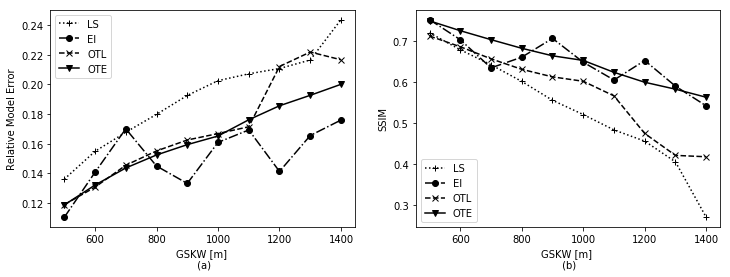

In [11]:
ModelErrors = dict()
freqs = np.linspace(500, 1400, 10)
plt.figure()
Markers = ['+', 'o', 'x', 'v']
LineStyles = [':', '-.', '--', '-']
fig, ax = plt.subplots(1,2,figsize=[12,4])
MSSIMs = []
vt = vt.astype('float32')
vt_tf = tf.convert_to_tensor(vt)
vt_tf = tf.reshape(vt_tf, [n[0],n[1],1])
for i in range(len(STR1)):
    Obj = list()
    freq = list()
    MSSIMis = []
    for j in range(len(freqs)):
        if Models[STR1[i]][Dicts[j]] is not None:
            ME_i = np.linalg.norm(np.array(Models[STR1[i]][Dicts[j]]) - np.array(vt)) / np.linalg.norm(np.array(vt))
            Obj.append(ME_i)
            freq.append(freqs[j])
            vf = Models[STR1[i]][Dicts[j]]
            vf = vf.astype('float32')
            vf_tf = tf.convert_to_tensor(vf)
            vf_tf = tf.reshape(vf_tf, [n[0],n[1],1])
            ssim_val1 = tf.image.ssim(vt_tf,vf_tf,max_val=3.5)
            freq.append(freqs[j])
            MSSIMis.append(ssim_val1)
            
    ax[0].plot(freqs,Obj, label=STR_LABEL[i], marker=Markers[i], color='black', linestyle=LineStyles[i])
    ax[1].plot(freqs,MSSIMis, label=STR_LABEL[i], marker=Markers[i], color='black', linestyle=LineStyles[i])
    
ax[0].set_xlabel('GSKW [m] \n (a)')
ax[1].set_xlabel('GSKW [m] \n (b)')
ax[0].set_ylabel('Relative Model Error')
ax[1].set_ylabel('SSIM')
ax[0].legend()
ax[1].legend()
FigureFile = FigureRootDir+FigureSubDir+'/Marmousi_IM_ModelError'
# plt.savefig(FigureFile + '.pdf', bbox_inches='tight')
# plt.savefig(FigureFile + '.png', bbox_inches='tight')
# plt.savefig(FigureFile + '.eps', bbox_inches='tight')


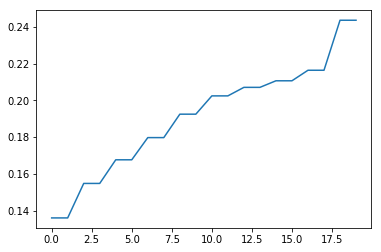

In [17]:
plt.plot(Obj)

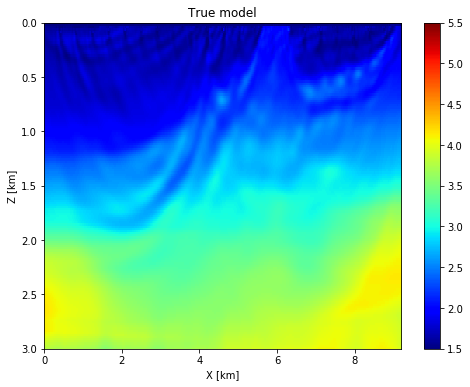

In [32]:
str1 = '/' + STR1[1] + '_Result/' + STR1[1] + 'LS_BoxConstraint_SmoothInitial' + Dicts[0] 
ResultDir1 = ResultDirSF + str1

veifile = ResultDir1 + '/xm1_EI/x_51.mat'
A = sio.loadmat(veifile)
vei = A['data']
vei = vei.reshape([563,251]).transpose()
vei= vei[50:201, 51:512]

PaperSizeModel = [8,6]
fig, ax = plt.subplots(1,1,figsize=PaperSizeModel)
imagesc(vei, Lateral=xaxis, Depth=zaxis, clim=clim_vel, title_str='True model', 
                    xlabel='X [km]', ylabel='Z [km]', cmap='jet', ax=ax, fig=fig)
FigureFile = FigureRootDir+FigureSubDir+'/Marmousi_EI'
# plt.savefig(FigureFile + '.pdf', bbox_inches='tight')
# plt.savefig(FigureFile + '.png', bbox_inches='tight')
# plt.savefig(FigureFile + '.eps', bbox_inches='tight')

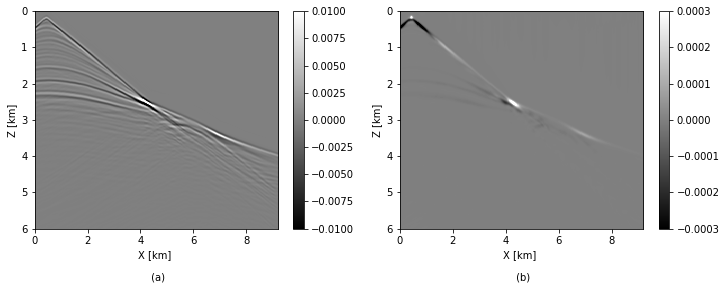

In [41]:
file_name_obs = ResultDir1 + '/Dobs.mat'
file_name_ini = ResultDir1 + '/Dini.mat'
A = sio.loadmat(file_name_obs)
Dobs = A['data']
A = sio.loadmat(file_name_ini)
Dini = A['data']
nt = Dini.shape[0]
ts = np.linspace(0.0,6.0,nt)
Et,Et2 = envelope_fun(Dobs,2)
Ei,Ei2 = envelope_fun(Dini,2)

PaperSizeModel = [12,4]
fig, ax = plt.subplots(1,2,figsize=PaperSizeModel)
imagesc(Dini-Dobs, Lateral=xaxis, Depth=ts, clim=[-.01,.01], title_str=None, 
                    xlabel='X [km] \n\n (a)', ylabel='Z [km]', cmap='gray', ax=ax[0], fig=fig)
imagesc(Ei-Et, Lateral=xaxis, Depth=ts, clim=[-.0003,.0003], title_str=None, 
                    xlabel='X [km] \n\n (b)', ylabel='Z [km]', cmap='gray', ax=ax[1], fig=fig)
FigureFile = FigureRootDir+FigureSubDir+'/EIDataCmp'
# plt.savefig(FigureFile + '.pdf', bbox_inches='tight')
# plt.savefig(FigureFile + '.png', bbox_inches='tight')
# plt.savefig(FigureFile + '.eps', bbox_inches='tight')
